# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [9]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('WELFake_Dataset.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 72134
Number of features: 4
Example data:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [11]:
# Handling missing values
# Replace NaN values with the mean for numeric columns, and with an empty string for non-numeric columns
for column in df.columns:
	if df[column].isnull().any():
		if pd.api.types.is_numeric_dtype(df[column]):
			mean_value = df[column].mean()
			df[column].fillna(mean_value, inplace=True)
		else:
			df[column].fillna('', inplace=True)
# Check again for missing values
missing_values_after = df.isnull().sum()
missing_values_after

C:\Users\ayham\AppData\Local\Temp\ipykernel_16772\2156423825.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('', inplace=True)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


<Axes: ylabel='count'>

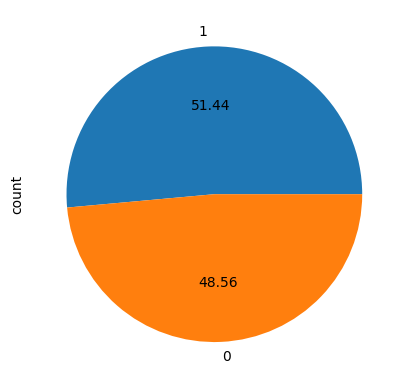

In [12]:
# Example: Plotting histograms of all numerical features
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.pie(autopct='%.2f')
# df.hist(figsize=(12, 12))
# plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


[('the', 1045714), ('to', 566838), ('of', 511668), ('a', 471605), ('and', 445179), ('in', 394445), ('that', 235115), ('on', 205008), ('for', 185489), ('is', 153696)]
[('the', 935802), ('to', 520789), ('of', 470704), ('and', 421474), ('a', 366101), ('in', 296670), ('that', 247282), ('is', 209696), ('for', 160759), ('on', 135904)]


C:\Users\ayham\AppData\Local\Temp\ipykernel_16772\3096111629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


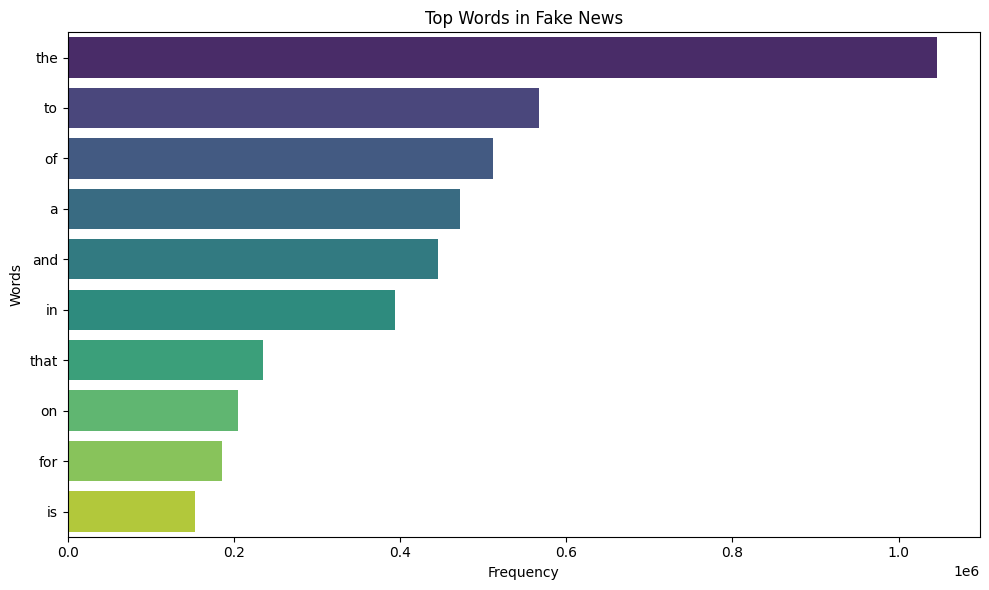

C:\Users\ayham\AppData\Local\Temp\ipykernel_16772\3096111629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


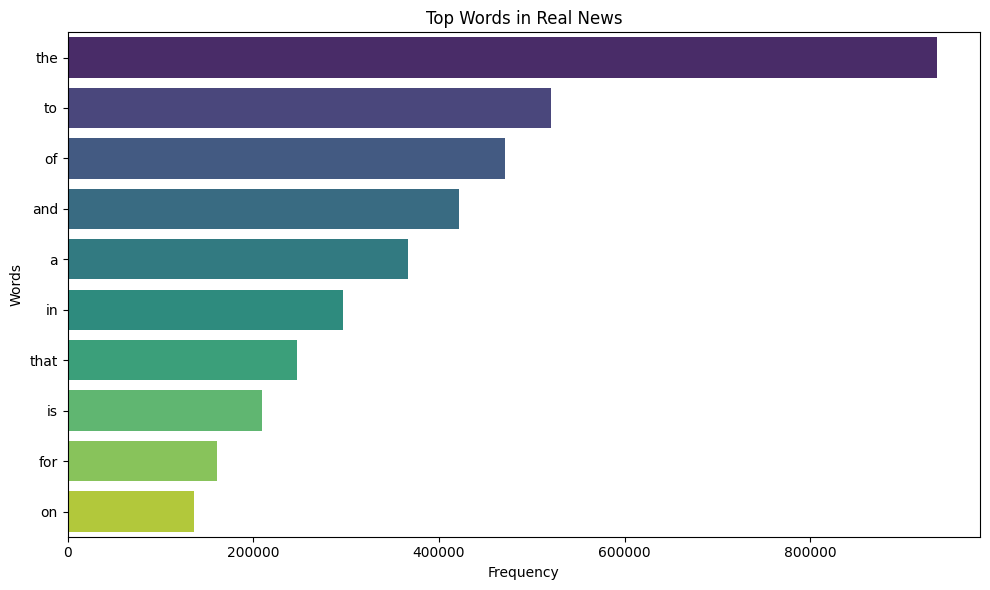

In [18]:
# Example: Plotting the top 10 most common words in fake and real news
from collections import Counter

fake_words_counter = Counter(' '.join(fake_text).split())
real_words_counter = Counter(' '.join(real_text).split())
top_fake_words = fake_words_counter.most_common(10)
top_real_words = real_words_counter.most_common(10)
print(top_fake_words)
print(top_real_words)

plot_top_words(top_fake_words, "Top Words in Fake News")
plot_top_words(top_real_words, "Top Words in Real News")

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


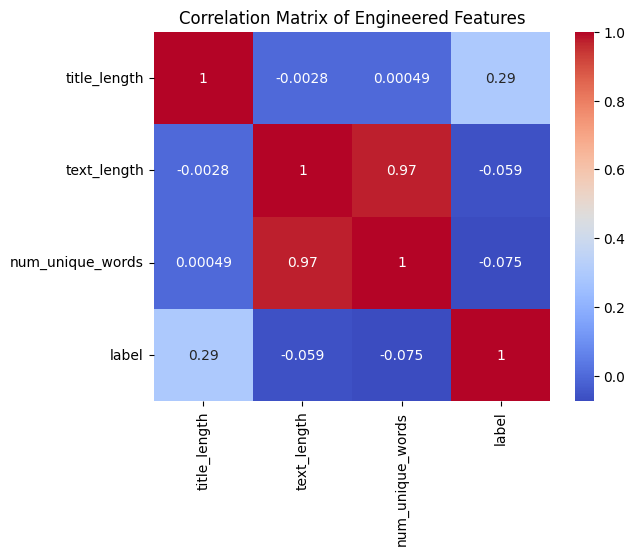

In [26]:
# Add new numeric features
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)
df['num_unique_words'] = df['text'].apply(lambda x: len(set(str(x).split())))

# Compute correlation matrix for new features
feature_cols = ['title_length', 'text_length', 'num_unique_words', 'label']
corr_matrix = df[feature_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features')
plt.show()
